In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/vega/vega/refs/heads/main/docs/data/seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


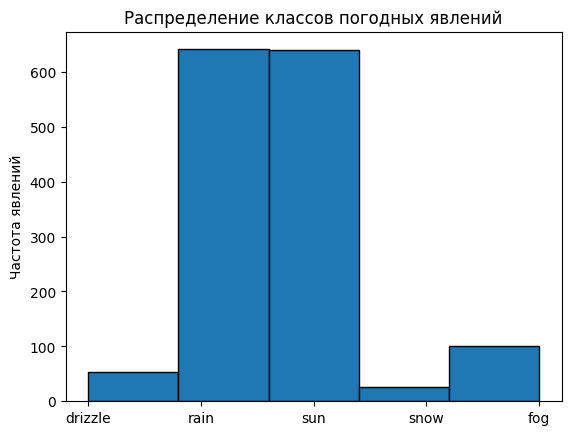

In [16]:
import matplotlib.pyplot as plt

plt.hist(df['weather'], bins=5, edgecolor='black')
plt.title('Распределение классов погодных явлений')
plt.ylabel('Частота явлений')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3,
                                                    random_state=42)

print("Форма тренировочной выборки:", X_train.shape, y_train.shape)
print("Форма тестовой выборки:", X_test.shape, y_test.shape)

Форма тренировочной выборки: (105, 4) (105,)
Форма тестовой выборки: (45, 4) (45,)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data = load_iris(as_frame=True)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3,
                                                    random_state=42)

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Матрица ошибок Логистическая Регрессия:\n", cm_lr)

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Матрица ошибок SVM:\n", cm_svm)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Матрица ошибок KNN:\n", cm_knn)

Матрица ошибок Логистическая Регрессия:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Матрица ошибок SVM:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Матрица ошибок KNN:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data = load_iris(as_frame=True)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3,
                                                    random_state=42)

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_lr)
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)

print("Логистическая регрессия:\n", classification_report(y_test, y_pred_lr))
print("SVM:\n", classification_report(y_test, y_pred_svm))
print("KNN:\n", classification_report(y_test, y_pred_knn))

Логистическая регрессия:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00    